In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/uber-ride-analytics-dashboard/ncr_ride_bookings.csv
/kaggle/input/uber-ride-analytics-dashboard/Dasboard.gif
/kaggle/input/uber-ride-analytics-dashboard/Uber.pbix


## Title: Uber Data Analytics Dashboard

## Description:
The Uber Data Analytics Dashboard is an interactive platform designed to visualize and analyze ride-hailing data for actionable insights. It enables tracking of key performance metrics such as total rides, revenue, active drivers, popular routes, trip durations, and customer ratings. Through dynamic charts, filters, and geospatial maps, the dashboard helps identify peak demand hours, high-traffic zones, seasonal trends, and driver efficiency. It supports data-driven decision-making for improving operational efficiency, optimizing resource allocation, enhancing customer satisfaction, and forecasting future demand patterns. This dashboard is ideal for business analysts, operations teams, and strategic planners in the mobility sector.

## Import dataset

In [2]:
df = pd.read_csv('/kaggle/input/uber-ride-analytics-dashboard/ncr_ride_bookings.csv')

In [3]:
df.sample(10)

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method
30486,2024-07-23,07:53:32,"""CNR4999711""",Completed,"""CID4620139""",Go Mini,Udyog Bhawan,Mansarovar Park,12.7,40.0,...,NaN,NaN,NaN,NaN,NaN,881.0,44.29,3.7,4.8,Debit Card
26164,2024-06-06,14:35:39,"""CNR4699860""",Completed,"""CID1198334""",Go Sedan,Moti Nagar,Seelampur,14.5,42.8,...,NaN,NaN,NaN,NaN,NaN,560.0,2.99,4.7,3.1,UPI
11410,2024-06-08,20:28:22,"""CNR2564595""",No Driver Found,"""CID9372621""",Auto,Nawada,Raj Nagar Extension,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14003,2024-12-17,10:31:11,"""CNR5092087""",Incomplete,"""CID7989127""",Uber XL,IGI Airport,Rithala,9.2,12.0,...,NaN,NaN,NaN,1.0,Customer Demand,486.0,14.47,NaN,NaN,Credit Card
77255,2024-01-30,18:37:05,"""CNR8286334""",Incomplete,"""CID8408028""",eBike,Indirapuram,Vasant Kunj,4.6,13.5,...,NaN,NaN,NaN,1.0,Other Issue,110.0,6.80,NaN,NaN,UPI
51105,2024-08-30,20:35:20,"""CNR4527716""",Cancelled by Driver,"""CID2683272""",Bike,IIT Delhi,Vidhan Sabha,6.4,NaN,...,NaN,1.0,More than permitted people in there,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30678,2024-02-17,17:32:06,"""CNR2334056""",Completed,"""CID4449030""",Premier Sedan,Kanhaiya Nagar,Keshav Puram,12.6,20.8,...,NaN,NaN,NaN,NaN,NaN,153.0,3.23,4.6,4.3,Debit Card
63113,2024-09-22,11:50:42,"""CNR3051202""",Completed,"""CID9771511""",Go Mini,IGI Airport,South Extension,7.3,27.8,...,NaN,NaN,NaN,NaN,NaN,597.0,4.51,3.8,5.0,UPI
23722,2024-10-14,14:22:35,"""CNR7053226""",Completed,"""CID2209145""",Auto,Jasola,New Colony,9.8,19.1,...,NaN,NaN,NaN,NaN,NaN,237.0,9.37,4.3,4.1,UPI
74615,2024-03-26,16:56:16,"""CNR7862819""",Completed,"""CID8523328""",Bike,IMT Manesar,Rohini,11.5,17.0,...,NaN,NaN,NaN,NaN,NaN,175.0,44.43,4.1,4.2,UPI


In [4]:
df.tail()

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method
149995,2024-11-11,19:34:01,"""CNR6500631""",Completed,"""CID4337371""",Go Mini,MG Road,Ghitorni,10.2,44.4,...,NaN,NaN,NaN,NaN,NaN,475.0,40.08,3.7,4.1,Uber Wallet
149996,2024-11-24,15:55:09,"""CNR2468611""",Completed,"""CID2325623""",Go Mini,Golf Course Road,Akshardham,5.1,30.8,...,NaN,NaN,NaN,NaN,NaN,1093.0,21.31,4.8,5.0,UPI
149997,2024-09-18,10:55:15,"""CNR6358306""",Completed,"""CID9925486""",Go Sedan,Satguru Ram Singh Marg,Jor Bagh,2.7,23.4,...,NaN,NaN,NaN,NaN,NaN,852.0,15.93,3.9,4.4,Cash
149998,2024-10-05,07:53:34,"""CNR3030099""",Completed,"""CID9415487""",Auto,Ghaziabad,Saidulajab,6.9,39.6,...,NaN,NaN,NaN,NaN,NaN,333.0,45.54,4.1,3.7,UPI
149999,2024-03-10,15:38:03,"""CNR3447390""",Completed,"""CID4108667""",Premier Sedan,Ashok Park Main,Gurgaon Sector 29,3.5,33.7,...,NaN,NaN,NaN,NaN,NaN,806.0,21.19,4.6,4.9,Credit Card


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 21 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Date                               150000 non-null  object 
 1   Time                               150000 non-null  object 
 2   Booking ID                         150000 non-null  object 
 3   Booking Status                     150000 non-null  object 
 4   Customer ID                        150000 non-null  object 
 5   Vehicle Type                       150000 non-null  object 
 6   Pickup Location                    150000 non-null  object 
 7   Drop Location                      150000 non-null  object 
 8   Avg VTAT                           139500 non-null  float64
 9   Avg CTAT                           102000 non-null  float64
 10  Cancelled Rides by Customer        10500 non-null   float64
 11  Reason for cancelling by Customer  1050

In [6]:
df.describe()

,Avg VTAT,Avg CTAT,Cancelled Rides by Customer,Cancelled Rides by Driver,Incomplete Rides,Booking Value,Ride Distance,Driver Ratings,Customer Rating
count,139500.000000,102000.000000,10500.0,27000.0,9000.0,102000.000000,102000.000000,93000.000000,93000.000000
mean,8.456352,29.149636,1.0,1.0,1.0,508.295912,24.637012,4.230992,4.404584
std,3.773564,8.902577,0.0,0.0,0.0,395.805774,14.002138,0.436871,0.437819
min,2.000000,10.000000,1.0,1.0,1.0,50.000000,1.000000,3.000000,3.000000
25%,5.300000,21.600000,1.0,1.0,1.0,234.000000,12.460000,4.100000,4.200000
50%,8.300000,28.800000,1.0,1.0,1.0,414.000000,23.720000,4.300000,4.500000
75%,11.300000,36.800000,1.0,1.0,1.0,689.000000,36.820000,4.600000,4.800000
max,20.000000,45.000000,1.0,1.0,1.0,4277.000000,50.000000,5.000000,5.000000


In [7]:
df.isnull().sum()

Date                                      0
Time                                      0
Booking ID                                0
Booking Status                            0
Customer ID                               0
Vehicle Type                              0
Pickup Location                           0
Drop Location                             0
Avg VTAT                              10500
Avg CTAT                              48000
Cancelled Rides by Customer          139500
Reason for cancelling by Customer    139500
Cancelled Rides by Driver            123000
Driver Cancellation Reason           123000
Incomplete Rides                     141000
Incomplete Rides Reason              141000
Booking Value                         48000
Ride Distance                         48000
Driver Ratings                        57000
Customer Rating                       57000
Payment Method                        48000
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values(by='Date')
df['Date_diff'] = df['Date'].diff().dt.days




In [10]:
#df.sample(10)

df[['Date', 'Date_diff']]
filtered_df = df[df['Date_diff'] > 0.5].reset_index()
filtered_df[['Date','Date_diff']]

,Date,Date_diff
0,2024-01-02,1.0
1,2024-01-03,1.0
2,2024-01-04,1.0
3,2024-01-05,1.0
4,2024-01-06,1.0
...,...,...
359,2024-12-26,1.0
360,2024-12-27,1.0
361,2024-12-28,1.0
362,2024-12-29,1.0


In [11]:
df.dtypes

Date                                 datetime64[ns]
Time                                         object
Booking ID                                   object
Booking Status                               object
Customer ID                                  object
Vehicle Type                                 object
Pickup Location                              object
Drop Location                                object
Avg VTAT                                    float64
Avg CTAT                                    float64
Cancelled Rides by Customer                 float64
Reason for cancelling by Customer            object
Cancelled Rides by Driver                   float64
Driver Cancellation Reason                   object
Incomplete Rides                            float64
Incomplete Rides Reason                      object
Booking Value                               float64
Ride Distance                               float64
Driver Ratings                              float64
Customer Rat

In [12]:
df.shape

(150000, 22)

In [13]:
df.columns

Index(['Date', 'Time', 'Booking ID', 'Booking Status', 'Customer ID',
       'Vehicle Type', 'Pickup Location', 'Drop Location', 'Avg VTAT',
       'Avg CTAT', 'Cancelled Rides by Customer',
       'Reason for cancelling by Customer', 'Cancelled Rides by Driver',
       'Driver Cancellation Reason', 'Incomplete Rides',
       'Incomplete Rides Reason', 'Booking Value', 'Ride Distance',
       'Driver Ratings', 'Customer Rating', 'Payment Method', 'Date_diff'],
      dtype='object')

## Data visualizations

In [14]:
df.dtypes

Date                                 datetime64[ns]
Time                                         object
Booking ID                                   object
Booking Status                               object
Customer ID                                  object
Vehicle Type                                 object
Pickup Location                              object
Drop Location                                object
Avg VTAT                                    float64
Avg CTAT                                    float64
Cancelled Rides by Customer                 float64
Reason for cancelling by Customer            object
Cancelled Rides by Driver                   float64
Driver Cancellation Reason                   object
Incomplete Rides                            float64
Incomplete Rides Reason                      object
Booking Value                               float64
Ride Distance                               float64
Driver Ratings                              float64
Customer Rat

In [15]:
#Reload original data for debugging
df = pd.read_csv('/kaggle/input/uber-ride-analytics-dashboard/ncr_ride_bookings.csv')

In [16]:
# Convert Date & Time
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S', errors='coerce').dt.time
#Testing the 00:00:00.000 formatting for time 
#df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S.%f', errors='coerce') \
#                .dt.strftime('%H:%M:%S.%f').str.slice(0, 10)



In [17]:
df['Time']

0         12:29:38
1         18:01:39
2         08:56:10
3         17:17:25
4         22:08:00
            ...   
149995    19:34:01
149996    15:55:09
149997    10:55:15
149998    07:53:34
149999    15:38:03
Name: Time, Length: 150000, dtype: object

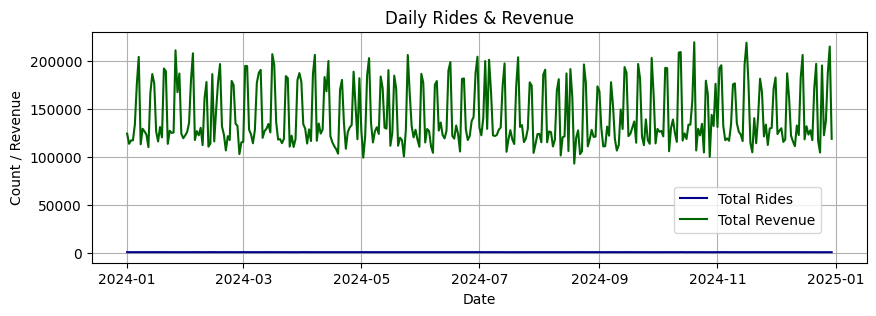

In [18]:
# 1️⃣ Time-series: Total Rides & Revenue Over Time
daily_stats = df.groupby('Date').agg({'Booking ID':'count', 'Booking Value':'sum'}).reset_index()
plt.figure(figsize=(10,3))
plt.plot(daily_stats['Date'], daily_stats['Booking ID'], label="Total Rides", color='darkblue')
plt.plot(daily_stats['Date'], daily_stats['Booking Value'], label="Total Revenue", color='darkgreen')
plt.title("Daily Rides & Revenue")
plt.xlabel("Date")
plt.ylabel("Count / Revenue")
plt.legend(loc='lower right', bbox_to_anchor=(0.95, 0.1))
plt.grid(True)
plt.show()


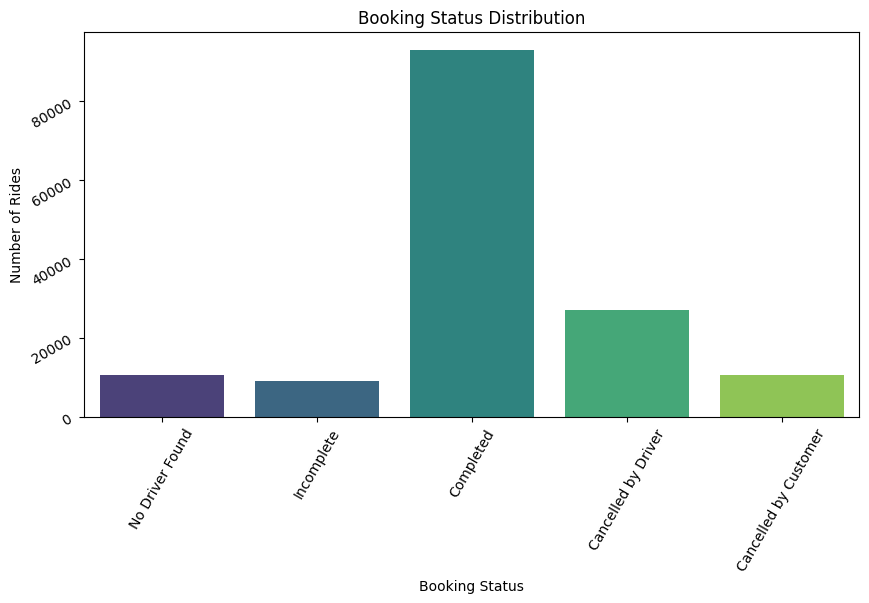

In [19]:
# 2️⃣ Booking Status Breakdown
plt.figure(figsize=(10,5))
sns.countplot(x='Booking Status', data=df, palette='viridis')
plt.title("Booking Status Distribution")
plt.ylabel("Number of Rides")
plt.yticks(rotation=30)
plt.xticks(rotation=60)
plt.show()

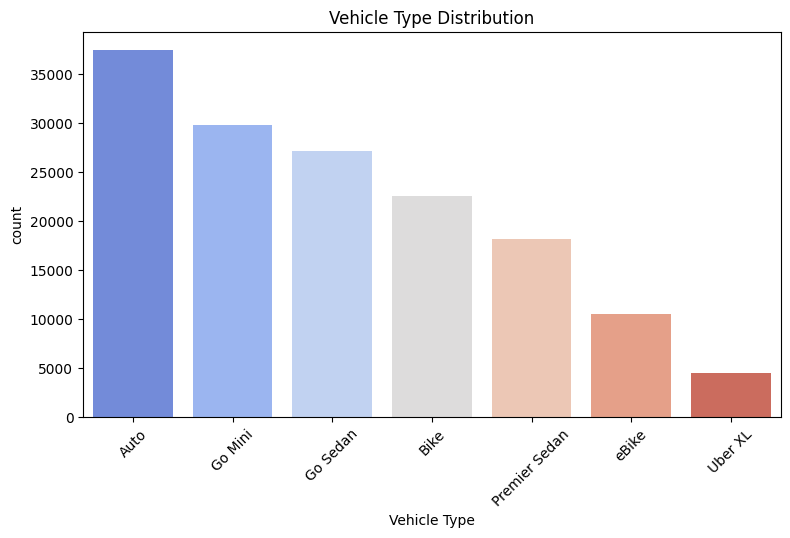

In [20]:
# 3️⃣ Vehicle Type Usage
plt.figure(figsize=(9,5))
sns.countplot(x='Vehicle Type', data=df, order=df['Vehicle Type'].value_counts().index, palette='coolwarm')
plt.title("Vehicle Type Distribution")
plt.xticks(rotation=45)
plt.show()

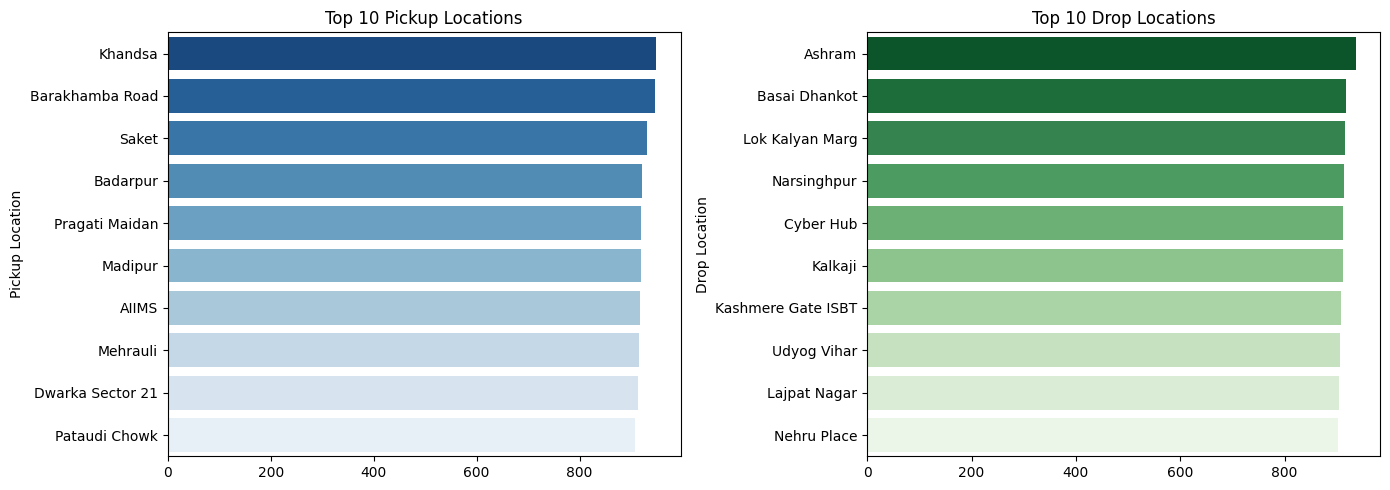

In [21]:
# 4️⃣ Top 10 Pickup & Drop Locations
top_pickups = df['Pickup Location'].value_counts().head(10)
top_drops = df['Drop Location'].value_counts().head(10)

fig, axes = plt.subplots(1, 2, figsize=(14,5))
sns.barplot(x=top_pickups.values, y=top_pickups.index, ax=axes[0], palette='Blues_r')
axes[0].set_title("Top 10 Pickup Locations")
sns.barplot(x=top_drops.values, y=top_drops.index, ax=axes[1], palette='Greens_r')
axes[1].set_title("Top 10 Drop Locations")
plt.tight_layout()
plt.show()

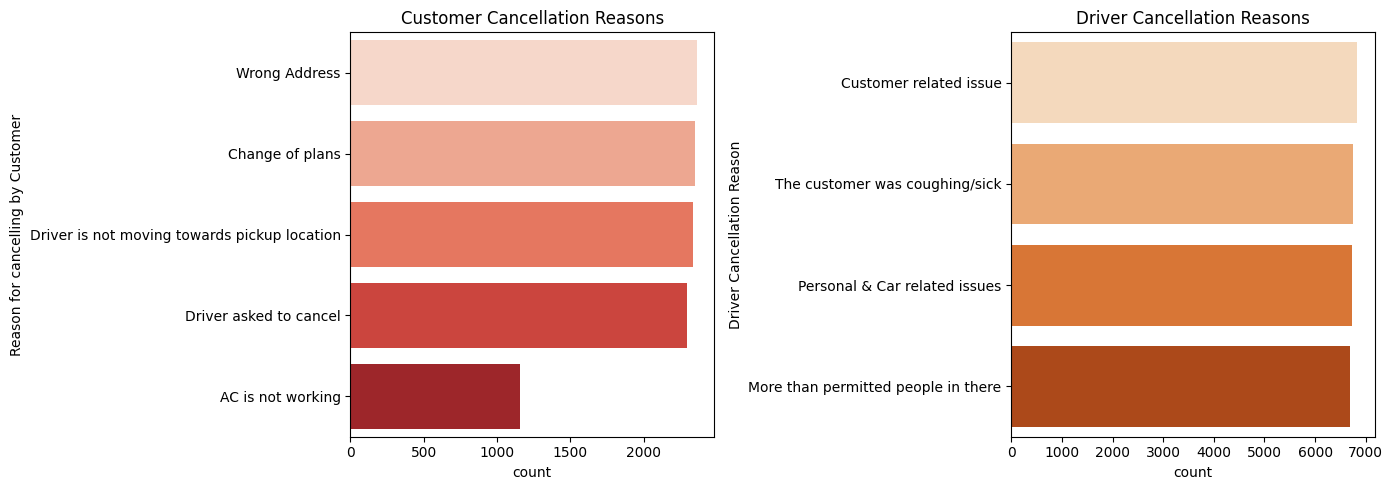

In [22]:
# 5️⃣ Cancellation Reasons (Customer & Driver)
fig, axes = plt.subplots(1, 2, figsize=(14,5))
sns.countplot(y='Reason for cancelling by Customer', data=df, order=df['Reason for cancelling by Customer'].value_counts().index, ax=axes[0], palette='Reds')
axes[0].set_title("Customer Cancellation Reasons")
sns.countplot(y='Driver Cancellation Reason', data=df, order=df['Driver Cancellation Reason'].value_counts().index, ax=axes[1], palette='Oranges')
axes[1].set_title("Driver Cancellation Reasons")
plt.tight_layout()
plt.show()

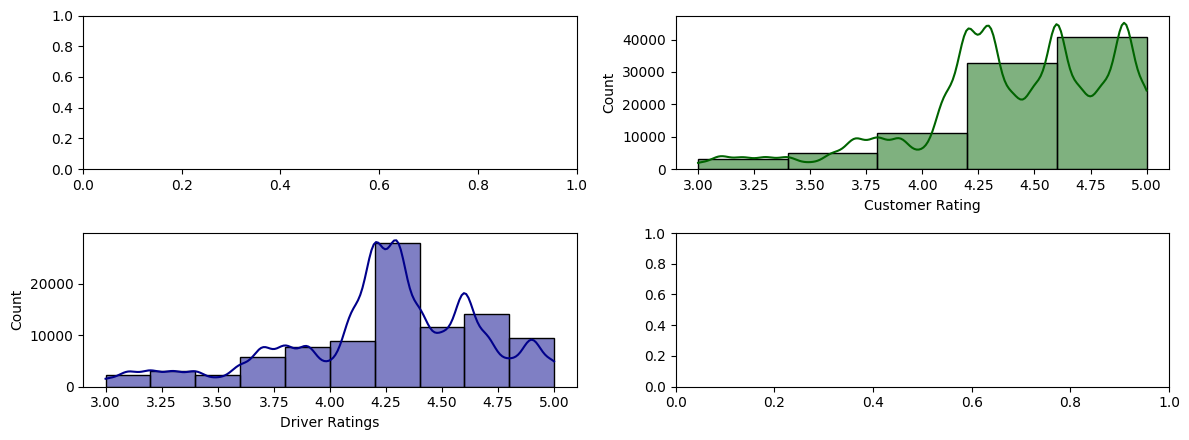

In [23]:
# 6️⃣ Rating Distributions (Driver & Customer)
fig, axes = plt.subplots(2, 2, figsize=(12,4.5))
sns.histplot(df['Driver Ratings'], bins=10, kde=True, ax=axes[1,0], color='darkblue')
#axes[0,0].set_title("Driver Ratings Distribution")
sns.histplot(df['Customer Rating'], bins=5, kde=True, ax=axes[0,1], color='darkgreen')
#axes[1,1].set_title("Customer Ratings Distribution")
plt.tight_layout() #automatically adjusts the spacing between plot elements
plt.show()

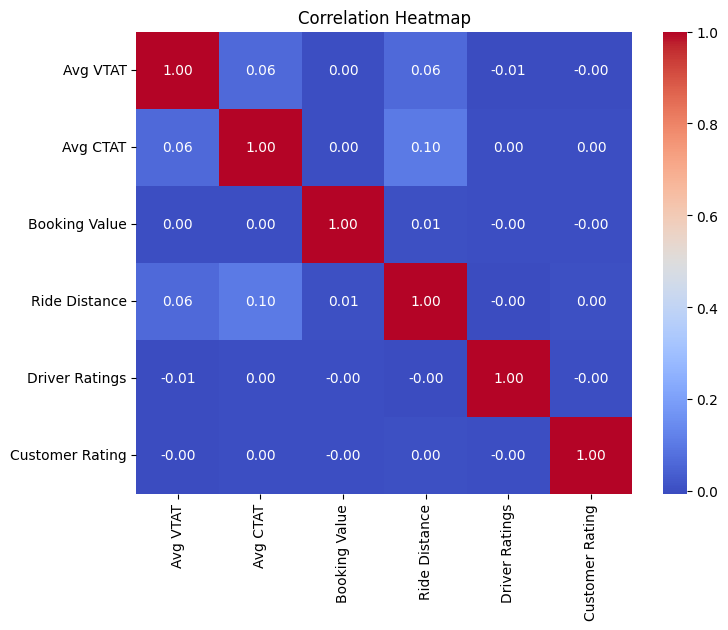

In [24]:
# 7️⃣ Correlation Heatmap
num_cols = ['Avg VTAT', 'Avg CTAT', 'Booking Value', 'Ride Distance', 'Driver Ratings', 'Customer Rating']
plt.figure(figsize=(8,6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

## Predictive modeling

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [26]:
# Convert date and time to datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S', errors='coerce')

# Extract useful date & time features
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['Hour'] = df['Time'].dt.hour
df['Minute'] = df['Time'].dt.minute

# Drop original date/time columns
df = df.drop(columns=['Date', 'Time'])

# Fill missing values
df = df.fillna("Unknown")

# Encode categorical variables
label_encoders = {}
for col in df.columns:
    if df[col].dtype == 'object' or isinstance(df[col].iloc[0], str):
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col].astype(str))
        label_encoders[col] = le

# Define features & target
target_col = "Booking Status"
X = df.drop(target_col, axis=1)
y = df[target_col]

# Scale numeric features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


                 Model  Accuracy (%)
0  Logistic Regression        100.00
1        Decision Tree        100.00
2        Random Forest        100.00
3          Naive Bayes        100.00
4                  SVM        100.00
5                  KNN         99.96
6              XGBoost        100.00


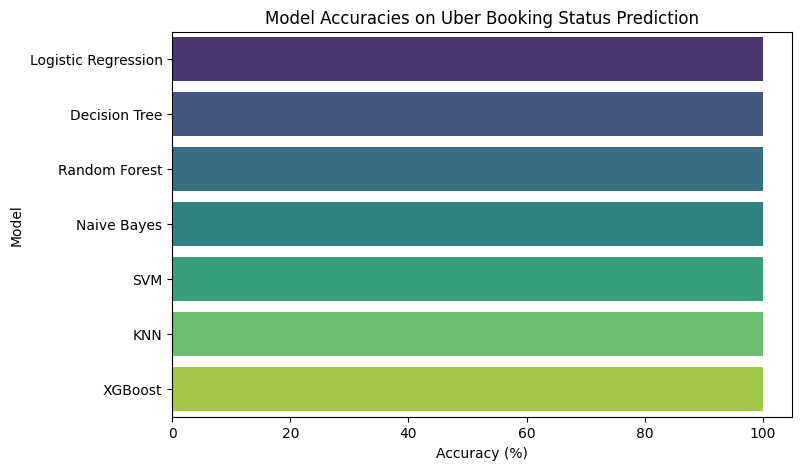

In [27]:
# Initialize models
models = {
    "Logistic Regression": LogisticRegression(max_iter=500),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Naive Bayes": GaussianNB(),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier()
}

# Try importing XGBoost if available
try:
    from xgboost import XGBClassifier
    models["XGBoost"] = XGBClassifier(eval_metric='mlogloss')
except ImportError:
    print("XGBoost not installed, skipping...")

# Train & evaluate
accuracies = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds) * 100
    accuracies[name] = round(acc, 2)

# Show results
results_df = pd.DataFrame(list(accuracies.items()), columns=["Model", "Accuracy (%)"])
print(results_df)

# Plot bar chart
plt.figure(figsize=(8,5))
sns.barplot(x="Accuracy (%)", y="Model", data=results_df, palette="viridis")
plt.title("Model Accuracies on Uber Booking Status Prediction")
plt.xlabel("Accuracy (%)")
plt.ylabel("Model")
plt.show()

## Thank you...pls upvote!!!!